In [1]:
import numpy as np
import xarray as xr
import os
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('./grl.mplstyle')

# from windwave.defs import Case, Interface2D
# from windwave.prepare import read_p, read_fields

%load_ext autoreload
%autoreload 3

In [2]:
from windwave.fio import read_fields_2D

In [15]:
####### NWP case attempt2 ########
# path = '/home/ctrsp-2024/jiarongw/outputs/test_NWP/'
# times = np.arange(38.5,40.3,0.1)
# ds_NWP = read_fields_2D(path, times, NSLICE=512, NGRID=512, varlist=['ux','uy','uz','f'])

####### NWP case attempt2 ########
# path = '/home/ctrsp-2024/jiarongw/outputs/test_NWP_redo/'
# times = np.arange(38.6,38.9,0.1)
# ds_NWP = read_fields_2D(path, times, NSLICE=512, NGRID=512, varlist=['ux','uy','uz','f','ax'])

####### NWP case attempt3 ########
# path = '/home/ctrsp-2024/jiarongw/outputs/test_NWP_redo2/'
# times = np.arange(38.6,38.8,0.1)
# ds_NWP2 = read_fields_2D(path, times, NSLICE=512, NGRID=512, varlist=['ux','uy','uz','f','ax','p'])

path = '/home/ctrsp-2024/jiarongw/outputs/test_NWP_ZPG/'
times = [38.51,39]
ds_NWP_sub = read_fields_2D(path, times, NSLICE=512, NGRID=512, varlist=['ux','uy','uz','f'])

path = '/home/ctrsp-2024/jiarongw/outputs/test_NWP_ZPG/'
times = np.arange(41.5,47,0.1)
ds_NWP = read_fields_2D(path, times, NSLICE=512, NGRID=512, varlist=['ux','uy','uz','f'])

####### Original case (stationary part) ########
path = '/home/ctrsp-2024/jiarongw/outputs/test/'
times = np.arange(38.5,46.3,0.1)
ds = read_fields_2D(path, times, NSLICE=512, NGRID=512, varlist=['ux','uy','uz','f'])

In [ ]:
''' What's the best way of computing the phase lag. '''

[Text(-3.141592653589793, 0, '$-\\pi$'),
 Text(-1.5707963267948966, 0, '$-\\pi/2$'),
 Text(0.0, 0, '$0$'),
 Text(1.5707963267948966, 0, '$\\pi/2$'),
 Text(3.141592653589793, 0, '$\\pi$')]

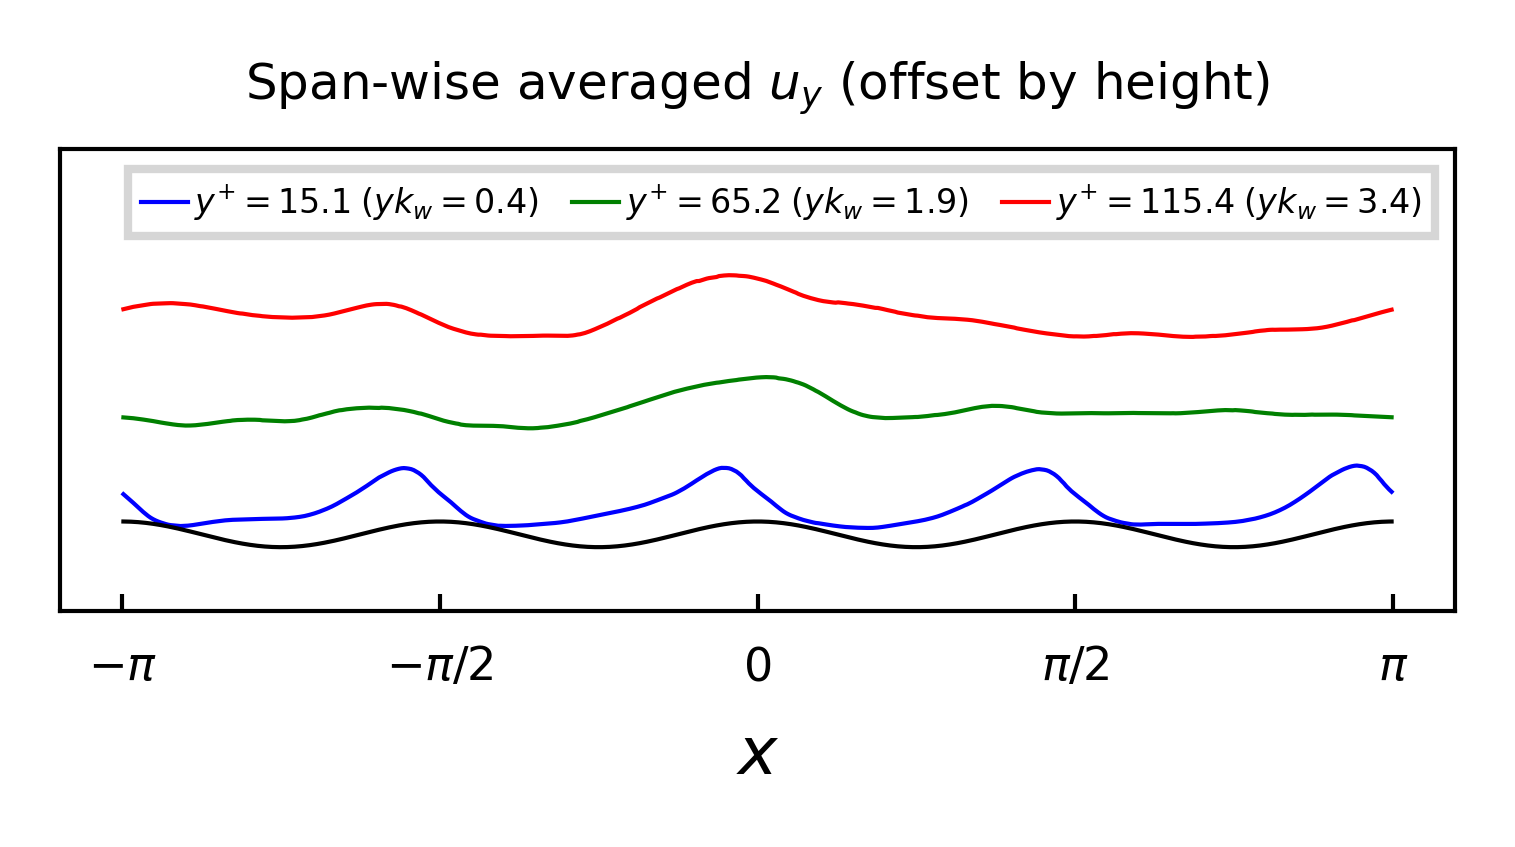

In [11]:
fig = plt.figure(figsize=[3,1])

zwall = (2*np.pi-1)/720
kwave = 4

c = ['b','g','r']
for i, ysel in enumerate((90,120,150)):
    yloc = ds.y.isel(y=ysel) - 1 
    plt.plot(ds.x, ds.uy.isel(t=0,y=ysel)+yloc, c=c[i],
             label='$y^{+}=%.1f \; (yk_w=%.1f)$' %(yloc/zwall,yloc*kwave))
        
plt.ylim([-.3,1.5])
plt.title('Span-wise averaged $u_y$ (offset by height)', fontsize=6)
plt.xlabel('$x$');plt.ylabel('$u_y$')
plt.legend(ncol=3, fontsize=4)
eta = np.cos(ds.x*kwave)*(0.2/kwave)
plt.plot(ds.x,eta,c='k')

ax = plt.gca()
ax.axes.get_yaxis().set_visible(False)
ax.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])

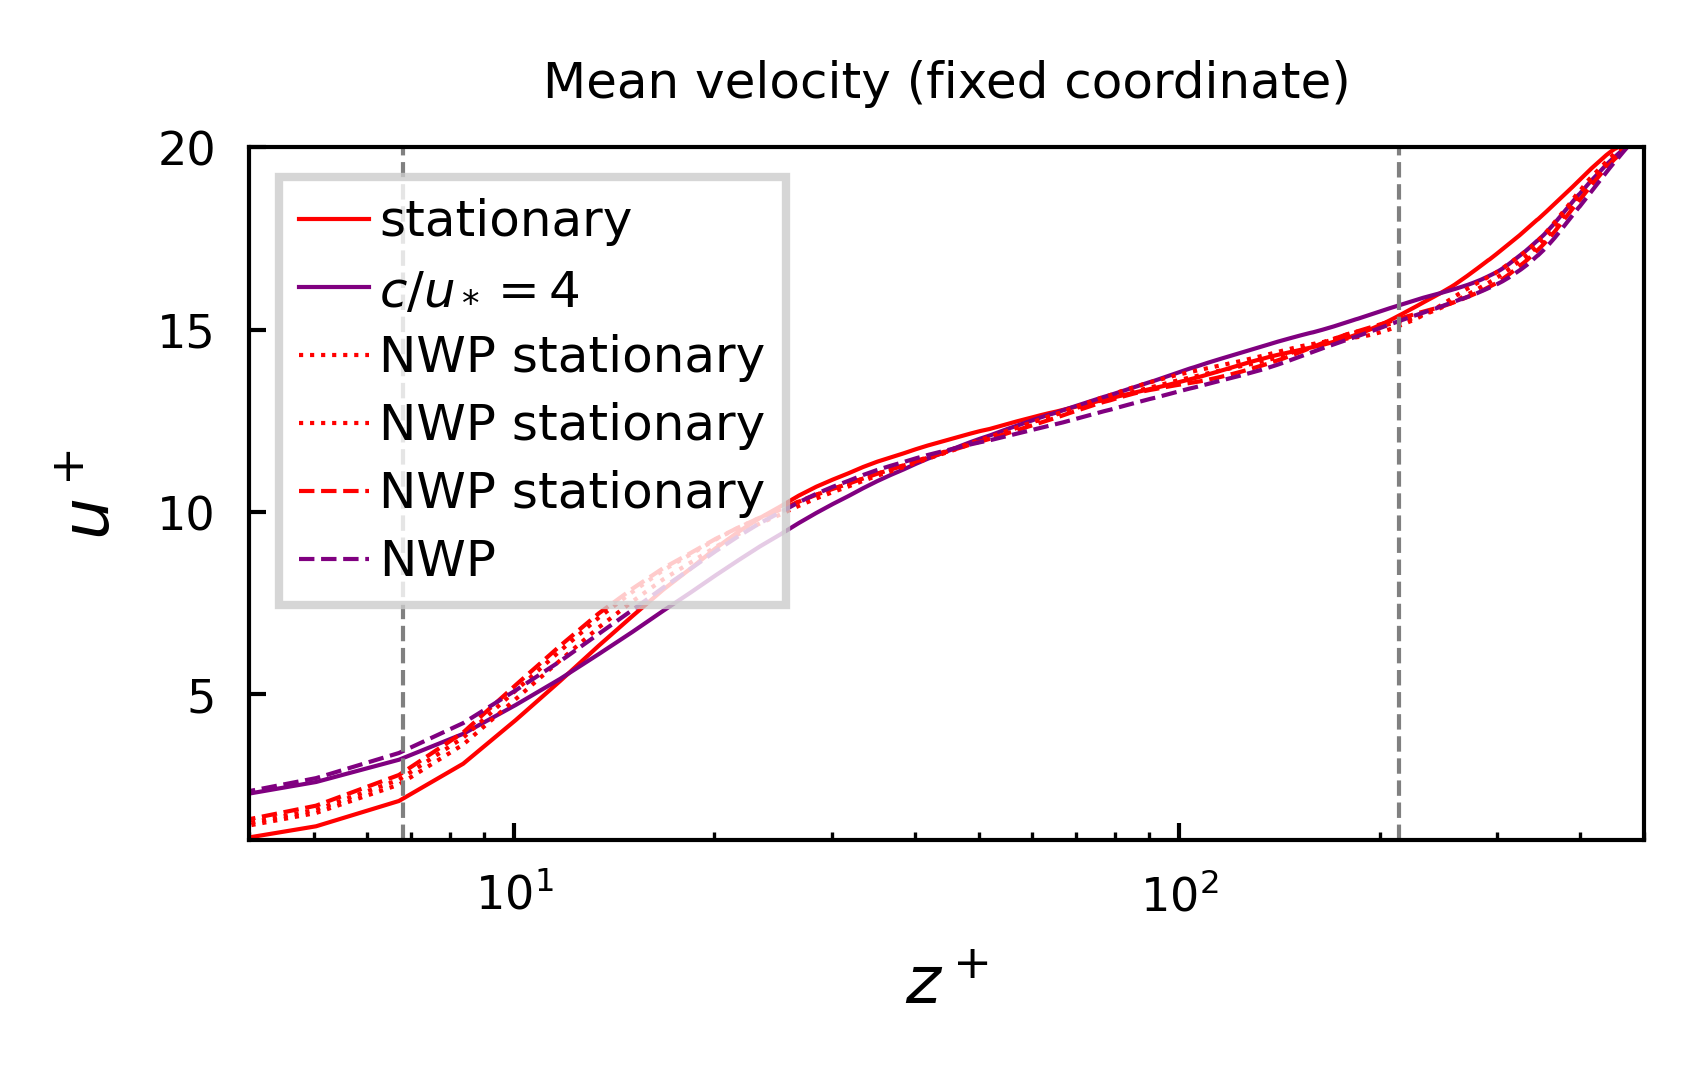

In [24]:
# Select the data within the time range
ds_sub1 = ds.ux.sel(t=slice(38.5,40))
ds_sub2 = ds.ux.sel(t=slice(44,46))
zwall = (2*np.pi-1)/720
ustar = 0.25
fig = plt.figure(figsize=[3,1.5])
plt.plot((ds.y-1)/zwall, ds_sub1.mean(dim=['x','t'])/ustar, color='red', label='stationary')
plt.plot((ds.y-1)/zwall, ds_sub2.mean(dim=['x','t'])/ustar, color='purple', label='$c/u_*=4$')

# NWP
ds_NWP_sub0 = ds_NWP.ux.sel(t=slice(42,43))
plt.plot((ds.y-1)/zwall, ds_NWP_sub0.mean(dim=['x','t'])/ustar, ':', color='red', label='NWP stationary')

ds_NWP_sub1 = ds_NWP.ux.sel(t=slice(43,44))
plt.plot((ds.y-1)/zwall, ds_NWP_sub1.mean(dim=['x','t'])/ustar, ':', color='red', label='NWP stationary')
ds_NWP_sub2 = ds_NWP.ux.sel(t=slice(44,45))
plt.plot((ds.y-1)/zwall, ds_NWP_sub2.mean(dim=['x','t'])/ustar, '--', color='red', label='NWP stationary')
ds_NWP_moving = ds_NWP.ux.sel(t=slice(45,47))
plt.plot((ds.y-1)/zwall, ds_NWP_moving.mean(dim=['x','t'])/ustar, '--', color='purple', label='NWP')


plt.axvline(x=0.2/4/zwall, linestyle='--', c='gray')
plt.axvline(x=2*np.pi/4/zwall, linestyle='--', c='gray')
plt.xlim([4,500]); plt.ylim([1,20])
plt.xscale('log')
plt.xlabel('$z^+$'); plt.ylabel('$u^+$')
plt.title('Mean velocity (fixed coordinate)', fontsize=6)
plt.legend(fontsize=6)

In [ ]:
# Specify the path of the folder you want to create
folder = '../plots/test_full'
os.makedirs(folder, exist_ok=True)

for i in range(0,len(ds.t)):   
    fig = plt.figure(figsize=[3,2])
    ax = plt.gca()
    im = ds.uy.isel(t=i).plot(x='x',vmax=0.3,vmin=-0.3,cmap='RdBu_r',
                         cbar_kwargs={'label':'$u_y$'})
    ax.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
    ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
    plt.xlabel('$x$'); plt.ylabel('$y$')
    plt.savefig(folder+'/uy_%g.png' %i)

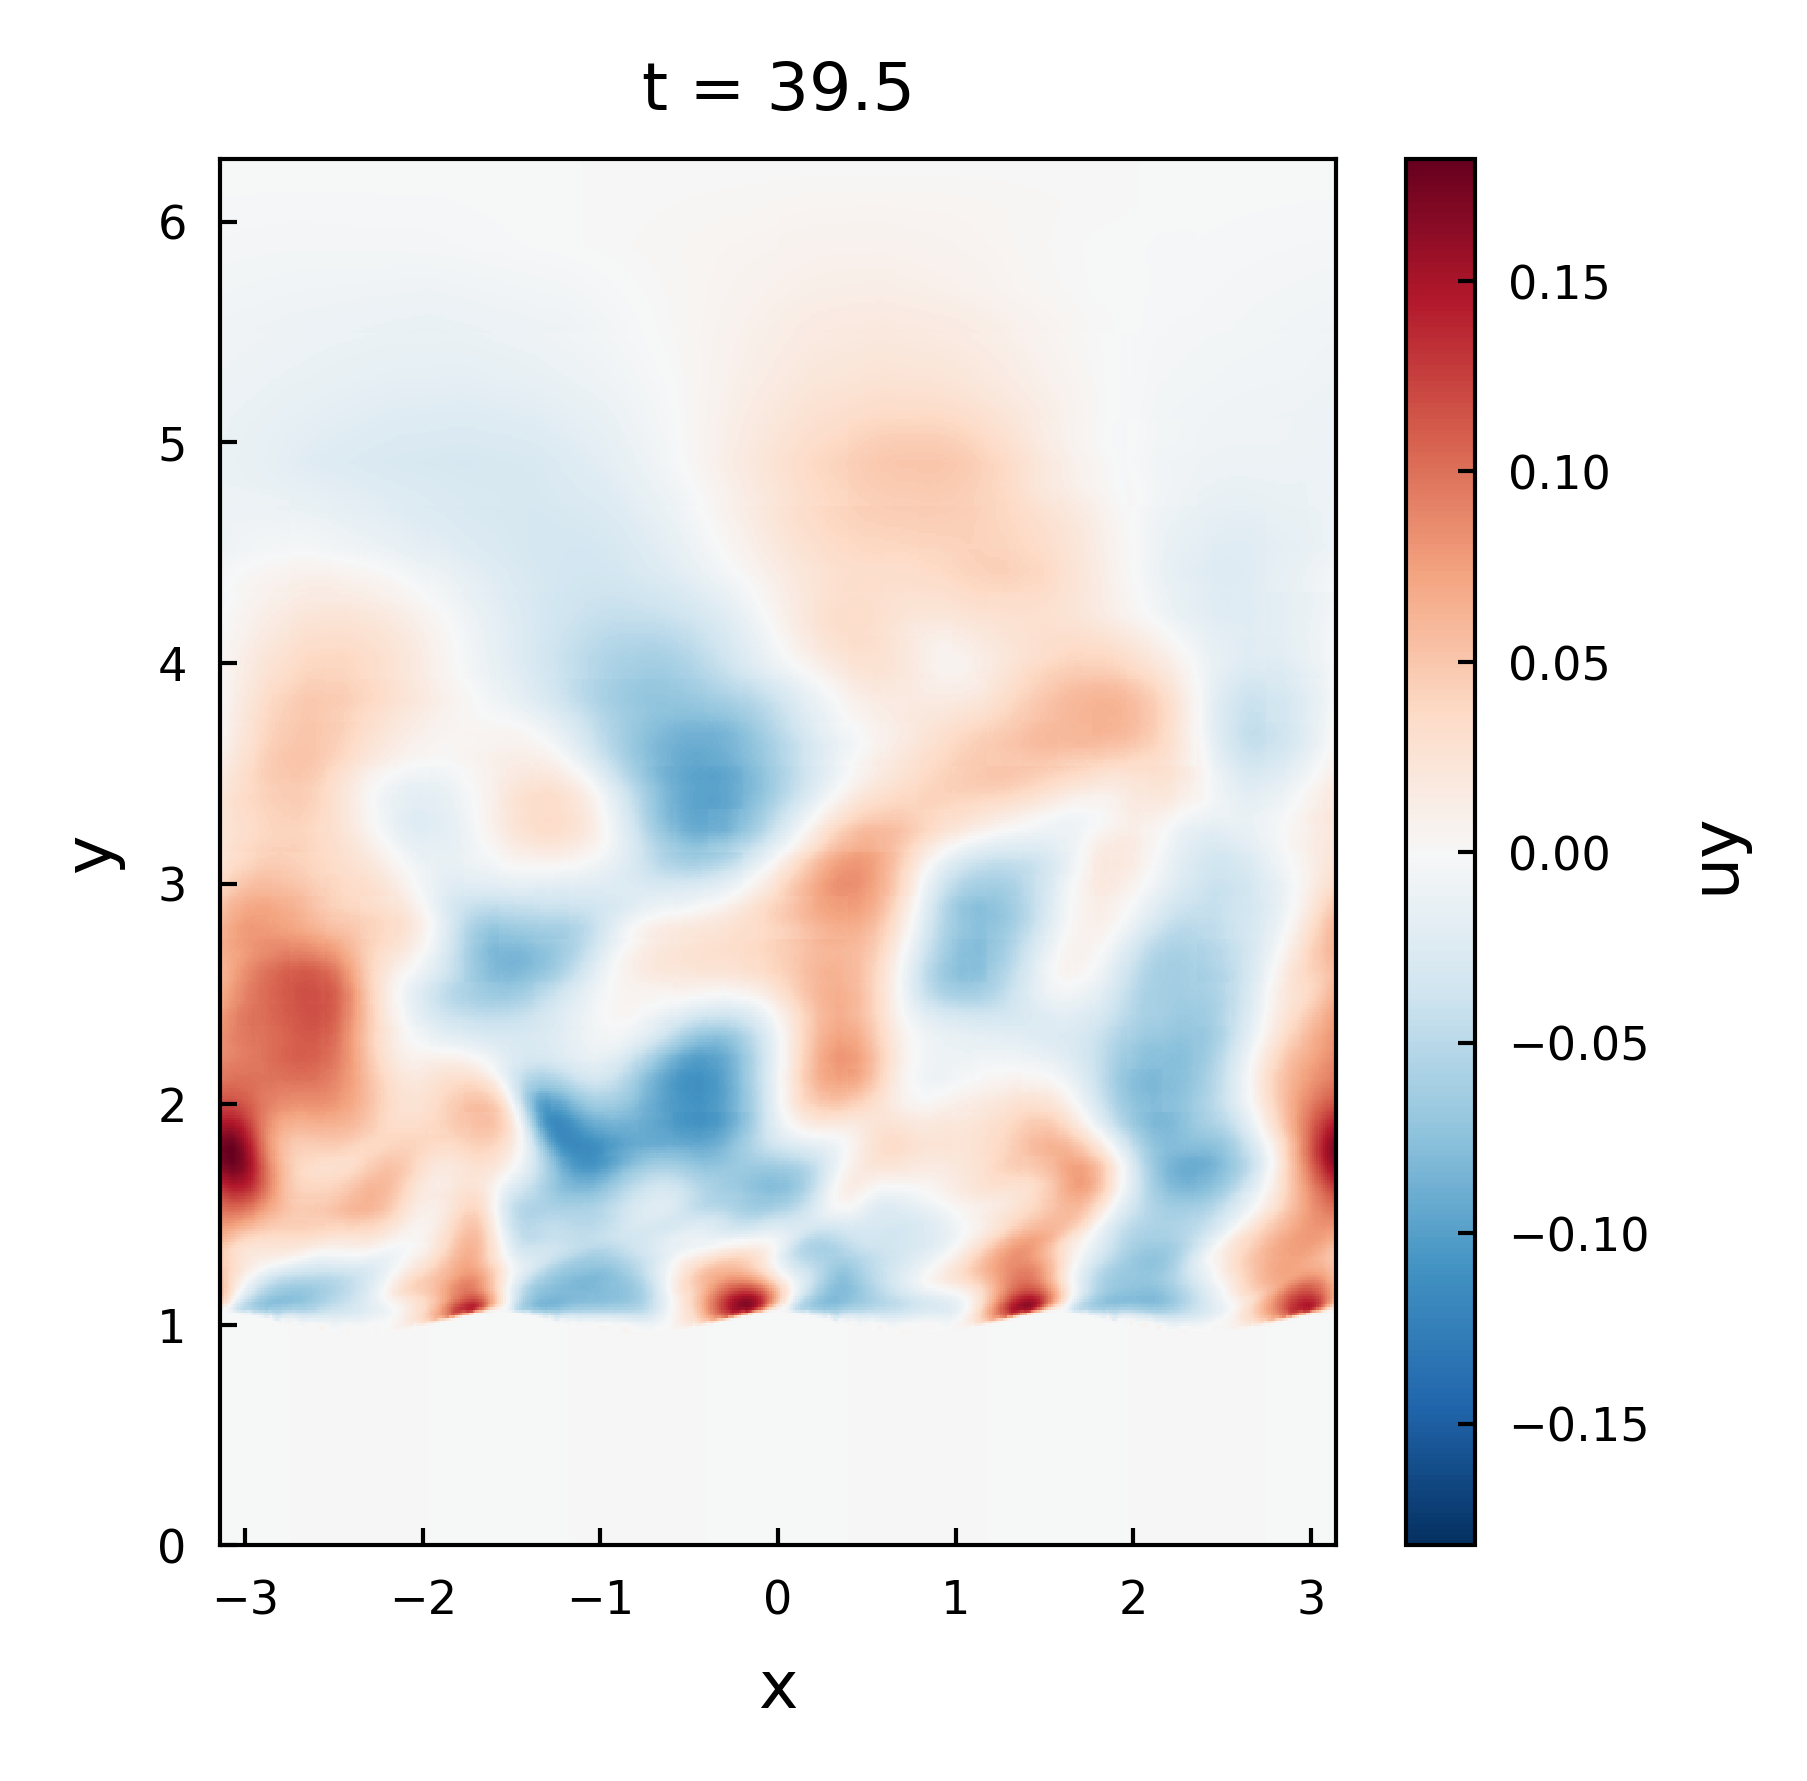

In [28]:
plt.figure(figsize=[3,3])
# pair.isel(t=0).plot(x='x', cmap='RdBu_r')
time = 39.5
(ds_NWP2.uy.sel(t=time)).plot(x='x', cmap='RdBu_r')

In [41]:
path = '/home/ctrsp-2024/jiarongw/outputs/test_NWP_ZPG/'
times = np.arange(39.5,40,0.5)
ds_NWP2 = read_fields_2D(path, times, NSLICE=512, NGRID=512, varlist=['ux','uy','uz','f','ax','pair'])
ds_NWP2

<xarray.Dataset> Size: 13MB
Dimensions:  (t: 1, x: 512, y: 512)
Coordinates:
  * t        (t) float64 8B 39.5
  * x        (x) float64 4kB -3.135 -3.123 -3.111 -3.099 ... 3.111 3.123 3.135
  * y        (y) float64 4kB 0.006136 0.01841 0.03068 ... 6.253 6.265 6.277
Data variables:
    ux       (t, x, y) float64 2MB 7.409e-07 7.409e-07 7.409e-07 ... 5.449 5.449
    uy       (t, x, y) float64 2MB -8.223e-07 -2.467e-06 ... -5.019e-05
    uz       (t, x, y) float64 2MB 1.127e-13 1.127e-13 ... 0.0002173 0.0002173
    f        (t, x, y) float64 2MB 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0
    ax       (t, x, y) float64 2MB 0.01055 0.01055 0.01055 ... 0.04634 0.04634
    pair     (t, x, y) float64 2MB 0.0 0.0 0.0 0.0 ... 0.06653 0.06653 0.06653

In [42]:
def convert_to_0_2pi(angle_rad_original):
    angle_rad = angle_rad_original % (2 * np.pi)  # Ensure angle is within [0, 2*pi)
    np.where(angle_rad < 0, angle_rad + 2 * np.pi, angle_rad)    
    return angle_rad

kx = 4
xtemp = ds_NWP2.x.copy(deep=True).values
theta = convert_to_0_2pi(xtemp*kx)
ds_NWP2 = ds_NWP2.assign_coords({'x': theta})
ds_NWP2 = ds_NWP2.rename({'x': 'phase'})
ds_NWP2 = ds_NWP2.assign_coords({'x': ('phase', xtemp)})


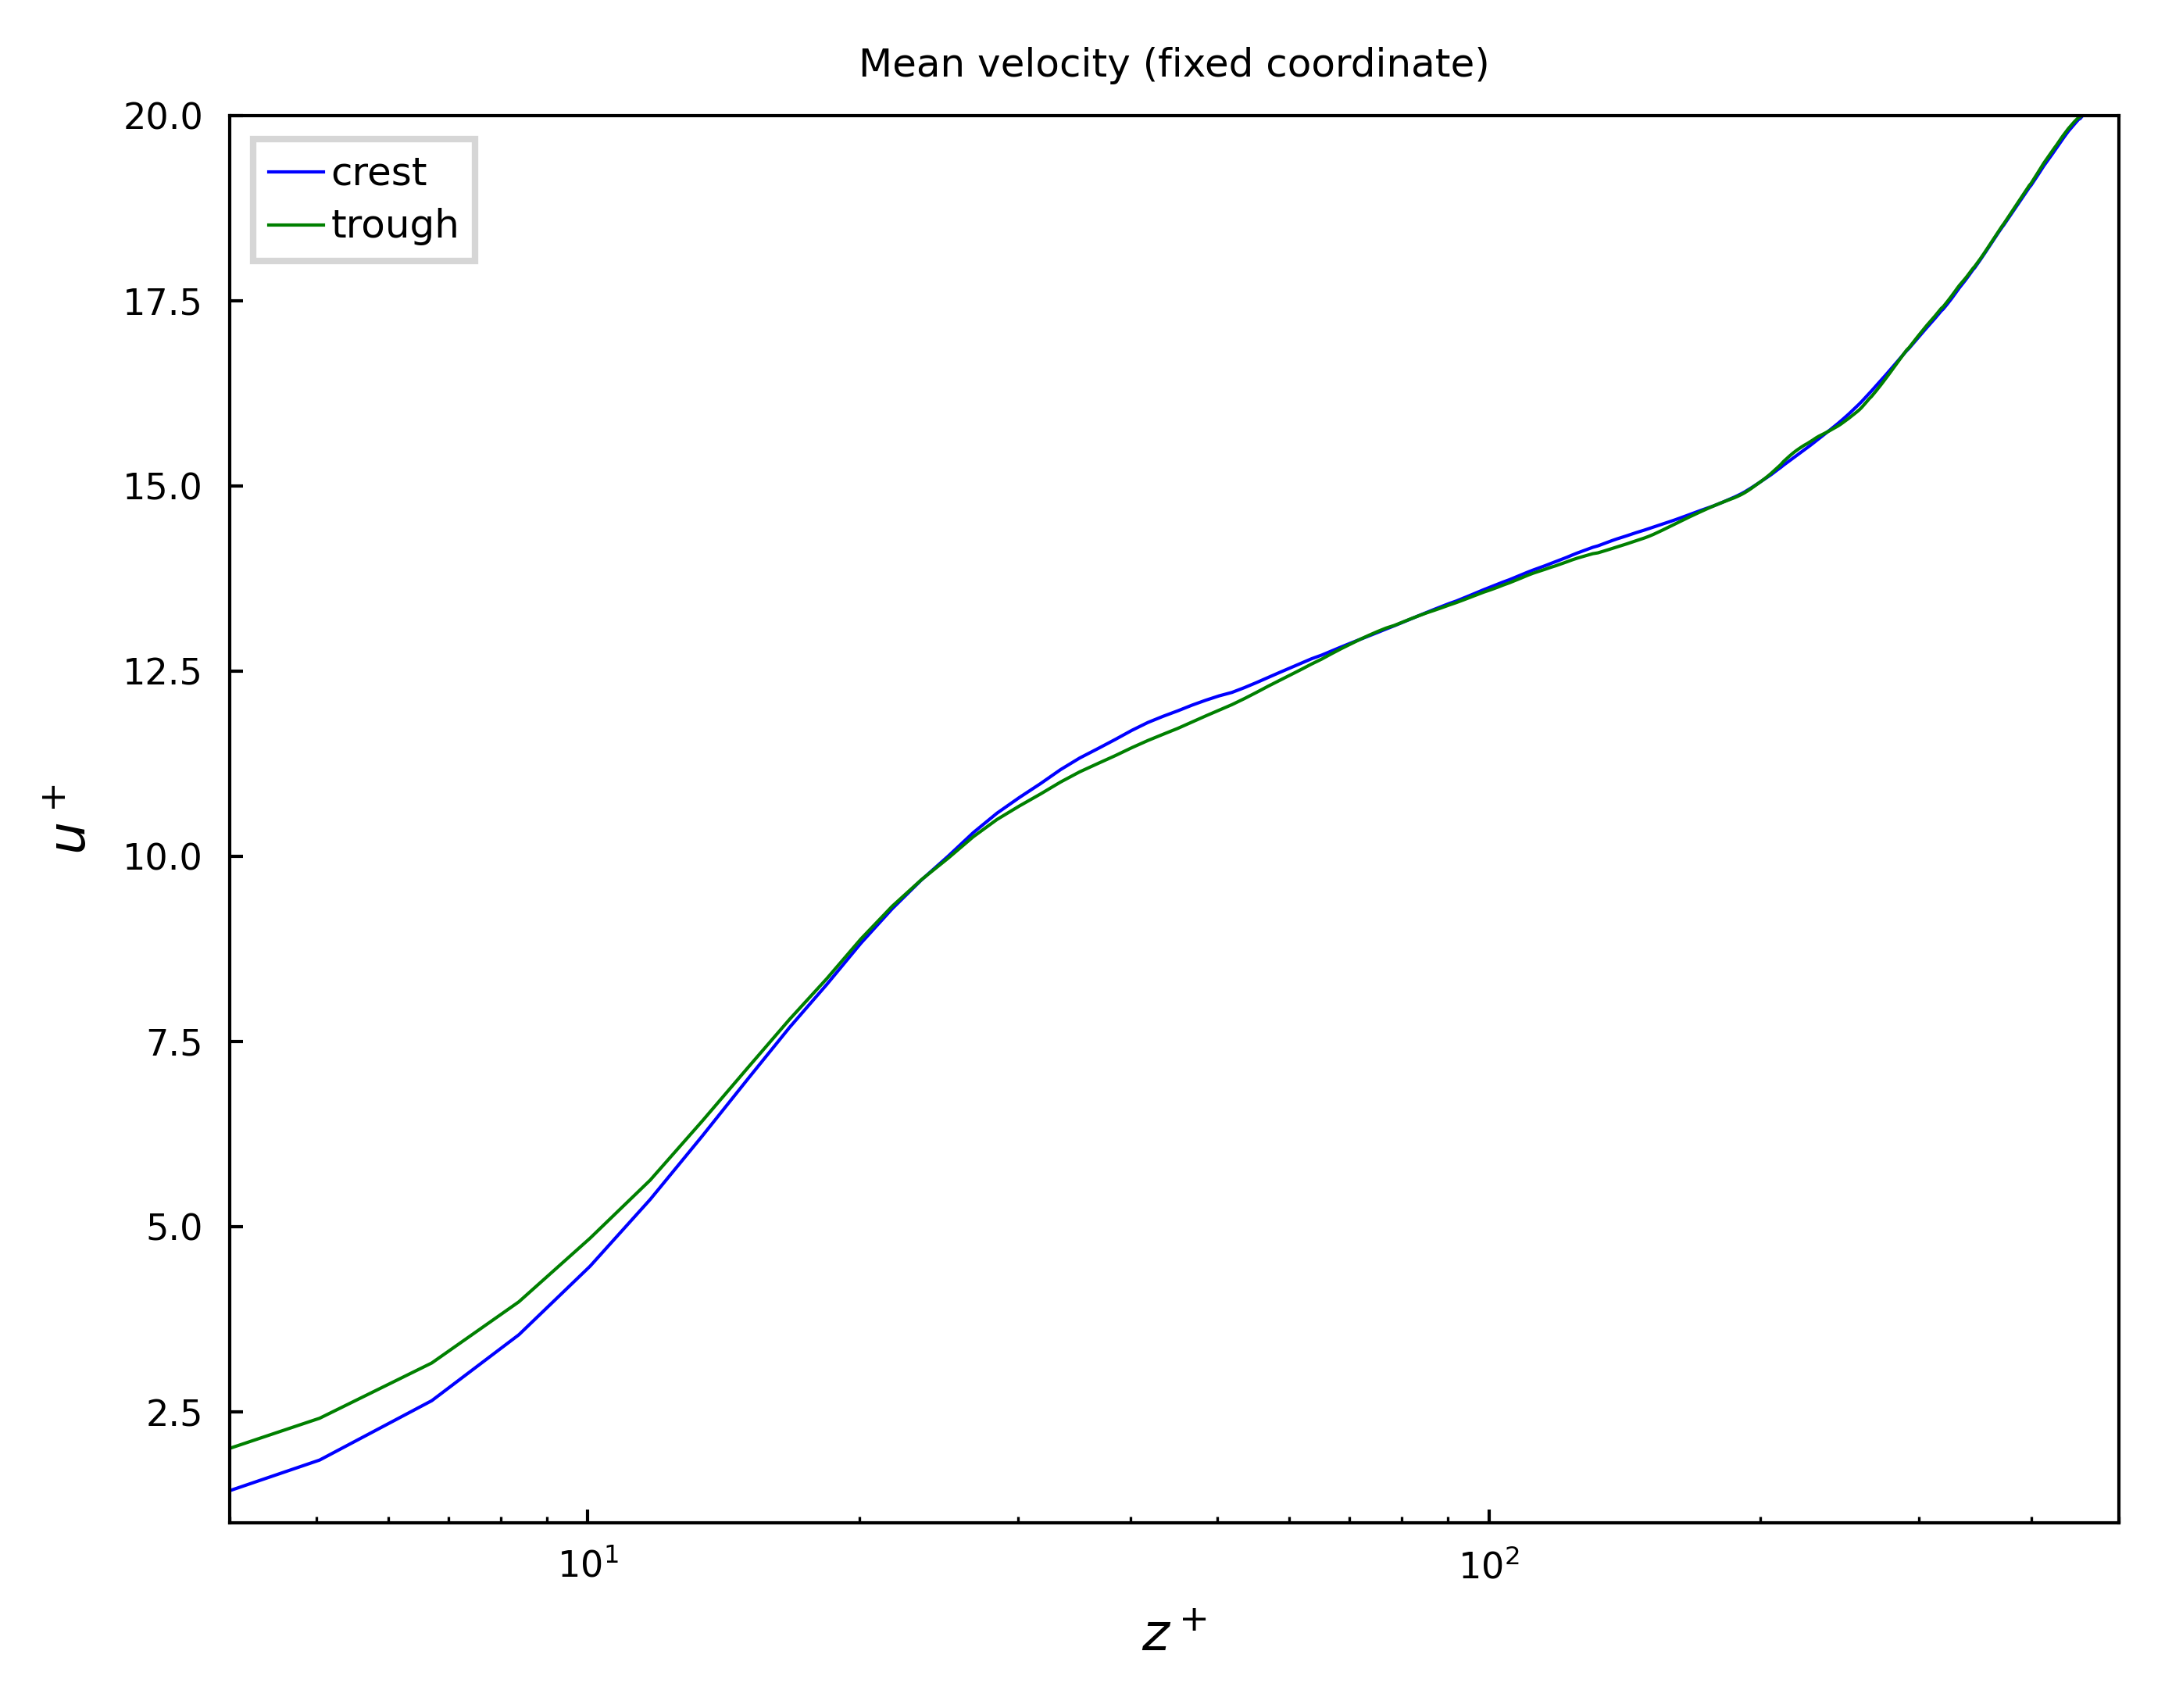

In [80]:
ds = 

zwall = (2*np.pi-1)/720
ustar = 0.25

tol = 2*np.pi/(512/4)

crest1 = ds.where(abs(ds.phase-np.pi/2)<tol,drop=True).ux.isel(t=0).mean(dim='phase')
crest2 = ds.where(abs(ds.phase-3*np.pi/2)<tol,drop=True).ux.isel(t=0).mean(dim='phase')
plt.plot((ds.y-1)/zwall, (crest1+crest2)/2/ustar, label='crest')
trough1 = ds.where(abs(ds.phase-np.pi)<tol,drop=True).ux.isel(t=0).mean(dim='phase')
trough2 = ds.where(abs(ds.phase-np.pi)<tol,drop=True).ux.isel(t=0).mean(dim='phase')
plt.plot((ds.y-1)/zwall, (trough1+trough2)/2/ustar, label='trough')

plt.xlim([4,500])
plt.ylim([1,20])
plt.xscale('log')
plt.xlabel('$z^+$'); plt.ylabel('$u^+$')
plt.title('Mean velocity (fixed coordinate)', fontsize=6)
plt.legend(fontsize=6)

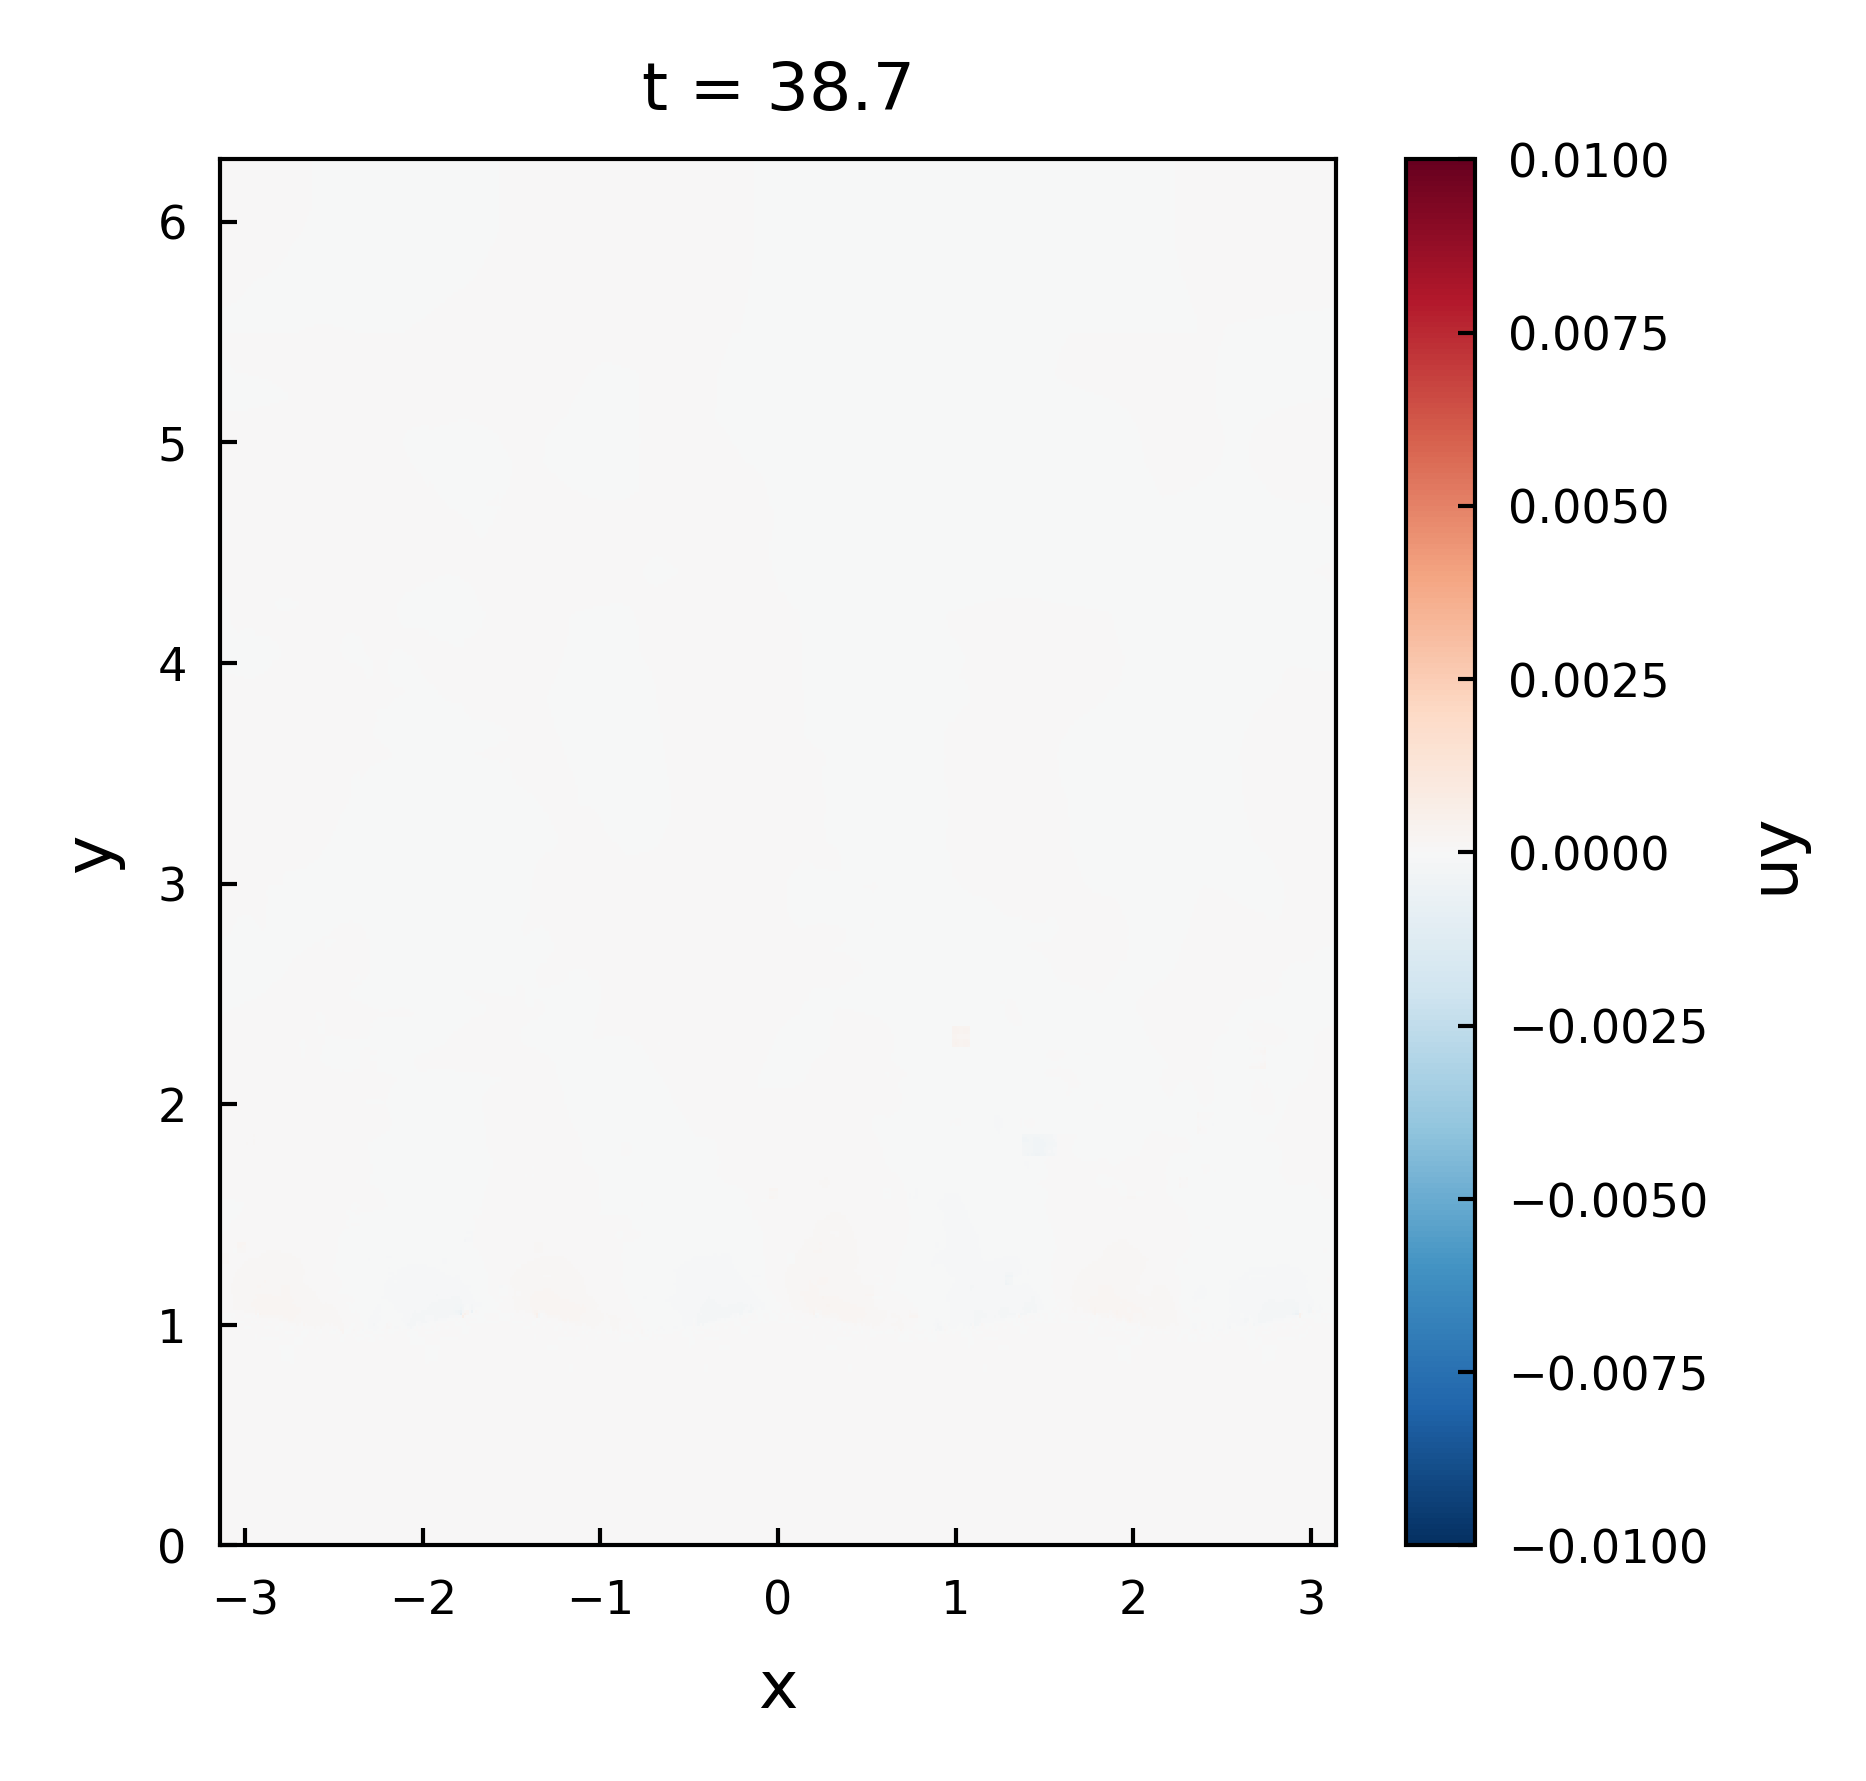

In [25]:
plt.figure(figsize=[3,3])
t = 38.7
(ds_NWP.uy.sel(t=t)-ds.uy.sel(t=t)).plot(x='x', cmap='RdBu_r', vmax=0.01, vmin=-0.01)